In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
clinical_df = pd.read_csv('../data/Clinical/TCGA-SKCM_clinical.csv', index_col = 0)
print(clinical_df.shape)
clinical_df.head()

(470, 72)


,ajcc_pathologic_n,state,progression_or_recurrence,tumor_stage,last_known_disease_status,days_to_last_follow_up,diagnosis_id,ajcc_pathologic_stage,prior_malignancy,primary_diagnosis,prior_treatment,ajcc_pathologic_m,age_at_diagnosis,days_to_last_known_disease_status,days_to_recurrence,morphology,year_of_diagnosis,days_to_diagnosis,classification_of_tumor,ajcc_pathologic_t,icd_10_code,updated_datetime,synchronous_malignancy,tumor_grade,site_of_resection_or_biopsy,tissue_or_organ_of_origin,ajcc_staging_system_edition,created_datetime,height,alcohol_history,alcohol_intensity,years_smoked,cigarettes_per_day,bmi,exposure_id,weight,year_of_death,age_at_index,vital_status,days_to_birth,gender,year_of_birth,ethnicity,race,demographic_id,days_to_death,treatments_pharmaceutical_therapeutic_agents,treatments_pharmaceutical_treatment_type,treatments_pharmaceutical_treatment_intent_type,treatments_pharmaceutical_treatment_or_therapy,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_initial_disease_status,treatments_pharmaceutical_treatment_effect,treatments_pharmaceutical_regimen_or_line_of_therapy,treatments_pharmaceutical_treatment_outcome,treatments_pharmaceutical_treatment_anatomic_site,treatments_pharmaceutical_days_to_treatment_end,treatments_pharmaceutical_days_to_treatment_start,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_type,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_or_therapy,treatments_radiation_treatment_id,treatments_radiation_initial_disease_status,treatments_radiation_treatment_effect,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_outcome,treatments_radiation_treatment_anatomic_site,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,bcr_patient_barcode,disease
submitter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-BF-A1PZ,N0,released,not reported,stage iib,not reported,853.0,58877acc-4579-5cbc-b0d7-a1a60f9d9360,Stage IIB,no,"Malignant melanoma, NOS",No,M0,26240.0,NaN,NaN,8720/3,2010.0,0.0,not reported,T4a,C44.9,2019-08-08T17:29:28.028808-05:00,No,not reported,"Skin, NOS","Skin, NOS",7th,NaN,163.0,Not Reported,NaN,NaN,NaN,21.077195,3224ecb7-496a-52b2-bb06-79faa29362bd,56.0,NaN,71.0,Alive,-26240.0,female,1939.0,not hispanic or latino,white,a951cc17-255b-52c1-8b16-06a110a1f256,NaN,NaN,"Pharmaceutical Therapy, NOS",NaN,no,a738fcf5-fbc5-54ae-9aca-a474c981980b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Radiation Therapy, NOS",NaN,no,606f9d0c-405a-51a7-83b6-850abd587e3e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-BF-A1PZ,SKCM
TCGA-HR-A5NC,NX,released,not reported,not reported,not reported,0.0,0a71cde5-a658-58fa-8f7d-5b461ed5ba0d,NaN,no,"Malignant melanoma, NOS",No,M0,32872.0,NaN,NaN,8720/3,NaN,0.0,not reported,T4,C44.5,2019-08-08T17:32:34.888606-05:00,No,not reported,Skin of trunk,"Skin, NOS",6th,NaN,152.0,Not Reported,NaN,NaN,NaN,NaN,6f513e61-8df3-557c-8970-79ed709b496c,NaN,NaN,90.0,Alive,-32872.0,female,NaN,not reported,not reported,2bf37b46-b292-5211-8308-8e7478e13fac,NaN,NaN,"Pharmaceutical Therapy, NOS",NaN,no,0a4cb88c-3f7d-58b9-861e-4e99f1e79879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Radiation Therapy, NOS",NaN,no,5bec652c-8fcf-5693-ba5f-a4c685cfbafd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-HR-A5NC,SKCM
TCGA-EE-A183,N0,released,not reported,stage 0,not reported,NaN,ad50acaa-3906-5038-a738-b1df7206c3fb,Stage 0,no,"Malignant melanoma, NOS",No,M0,17788.0,NaN,NaN,8720/3,2007.0,0.0,not reported,Tis,C77.3,2019-08-08T17:31:00.525265-05:00,No,not reported,Lymph nodes of axilla or arm,"Skin, NOS",6th,NaN,NaN,Not Reported,NaN,NaN,NaN,NaN,5e224124-5dc5-5e14-a52d-aebafebbdae1,NaN,2009.0,48.0,Dead,-17788.0,male,1959.0,not hispanic or latino,white,f890ebbe-7014-5316-9088-92d883eb8050,818.0,NaN,"Pharmaceutical Therapy, NOS",NaN,no,2ac616a8-887f-53c2-a8ea-ae66c6d48a02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Radiation Therapy, NOS",NaN,yes,f7775347-3381-519c-b1fd-c61f6d261154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA

stage iiic      68
stage iic       64
stage iiib      46
stage iii       41
not reported    38
stage ii        30
stage i         30
stage ib        29
stage iib       28
stage iv        23
stage ia        18
stage iia       18
stage iiia      16
i/ii nos        14
stage 0          7
Name: tumor_stage, dtype: int64


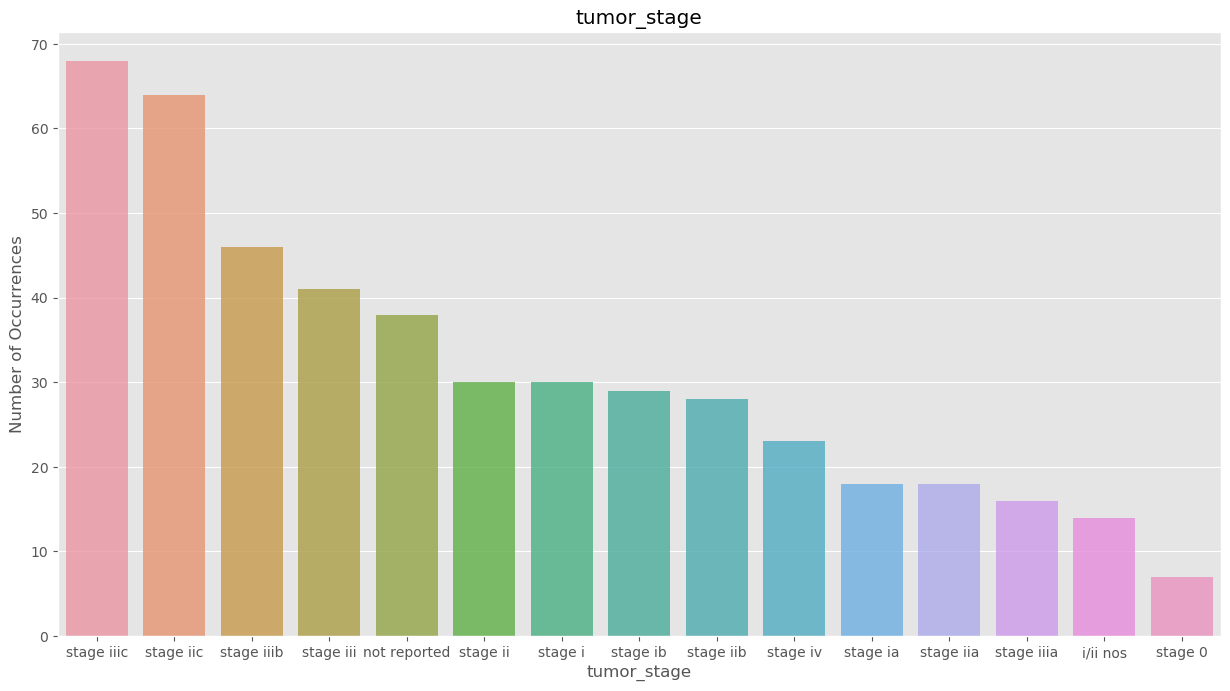

In [23]:
count  = clinical_df['tumor_stage'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('tumor_stage')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('tumor_stage', fontsize=12)
plt.show()

0               238
1               194
not reported     38
Name: tumor_stage, dtype: int64


Text(0.5, 0, 'tumor_stage')

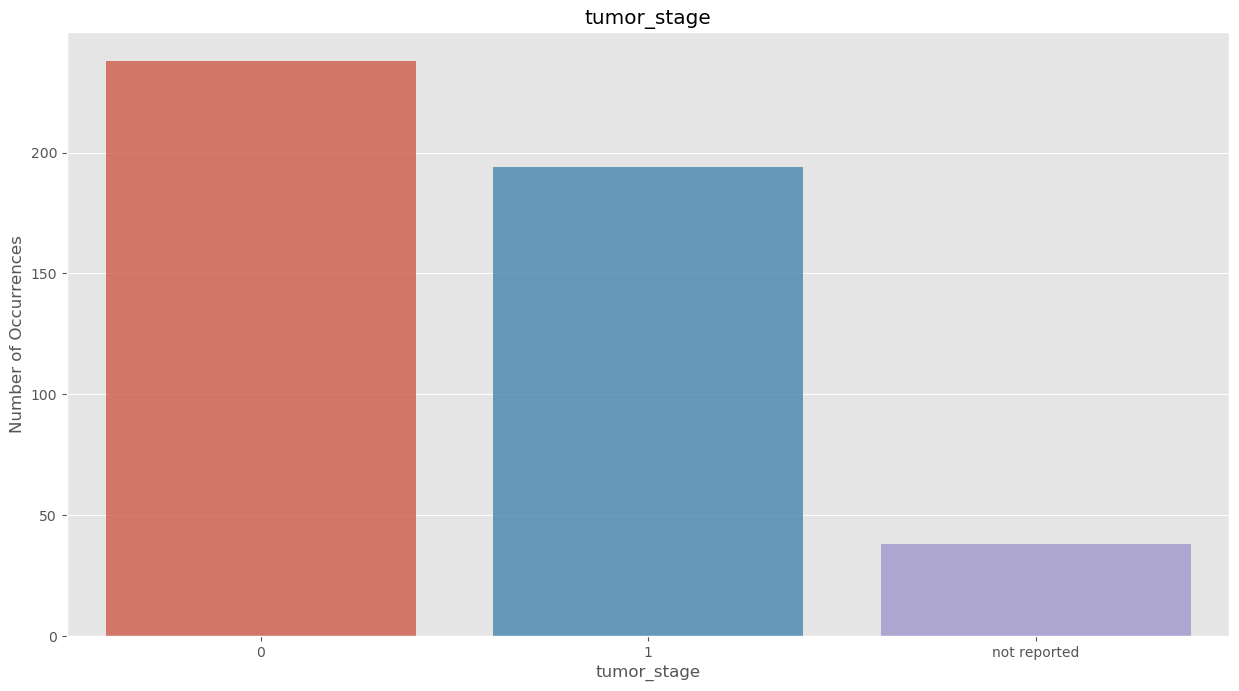

In [26]:
Y = clinical_df['tumor_stage'].to_frame()
Y = Y.replace({
    'stage iiic':   1,
    'stage iic':    0,
    'stage iiib':   1,  
    'stage iii':    1,
    'stage i':      0,
    'stage ib':     0,
    'stage ii':     0,
    'stage iib':    0,
    'stage iv':     1,
    'stage iia':    0,
    'stage ia':     0,
    'stage iiia':   1,
    'i/ii nos':     0,
    'stage 0':      0
})
count  = Y['tumor_stage'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('tumor_stage')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('tumor_stage', fontsize=12)

N0     235
N3      55
N1b     38
NX      36
N2b     21
N1a     19
N1      17
N2a     13
N2c      9
N2       6
Name: ajcc_pathologic_n, dtype: int64


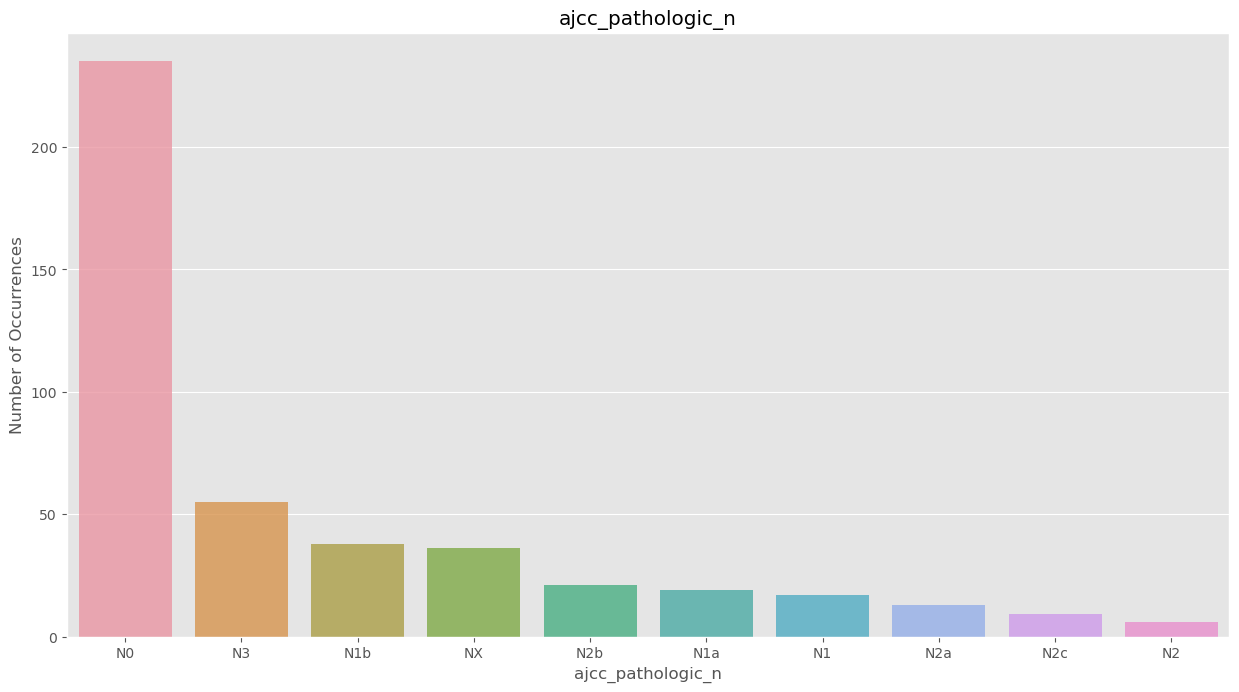

In [24]:
count  = clinical_df['ajcc_pathologic_n'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('ajcc_pathologic_n')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ajcc_pathologic_n', fontsize=12)
plt.show()

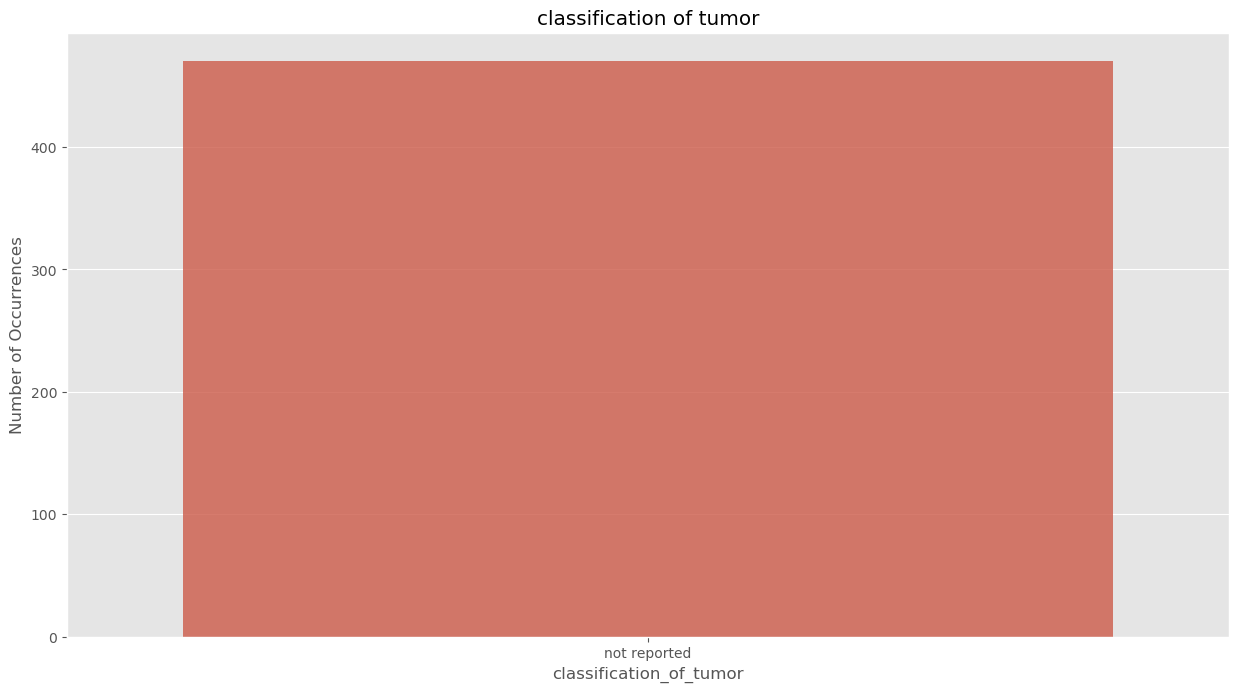

In [8]:
count  = clinical_df['classification_of_tumor'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('classification of tumor')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('classification_of_tumor', fontsize=12)
plt.show()

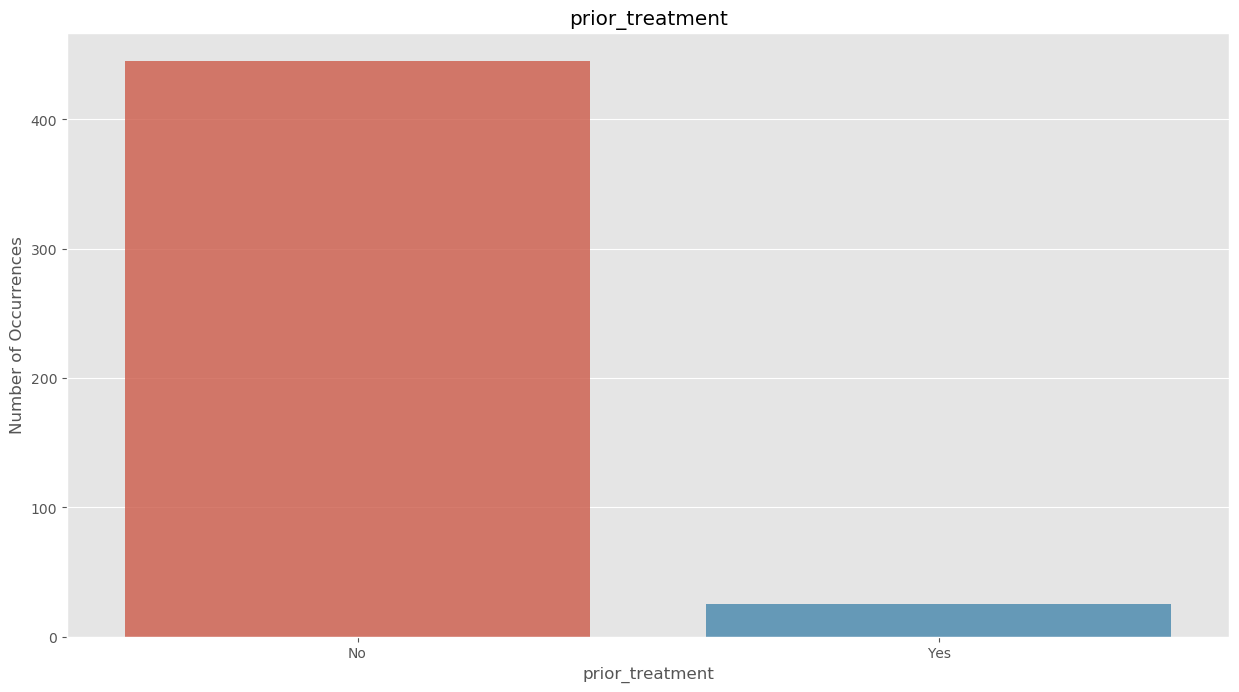

In [9]:
count  = clinical_df['prior_treatment'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('prior_treatment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('prior_treatment', fontsize=12)
plt.show()

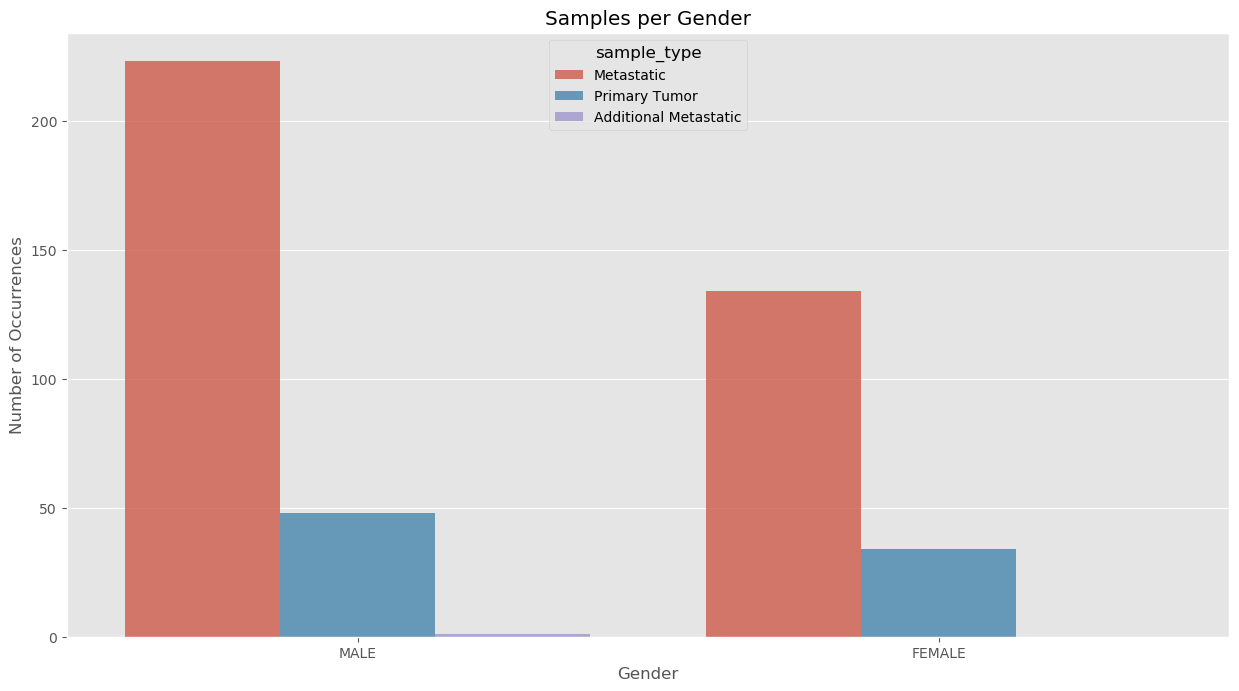

In [4]:
plt.figure()
sns.countplot(data=clinical_df, x='gender', hue='sample_type', alpha=0.8)
plt.title('Samples per Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

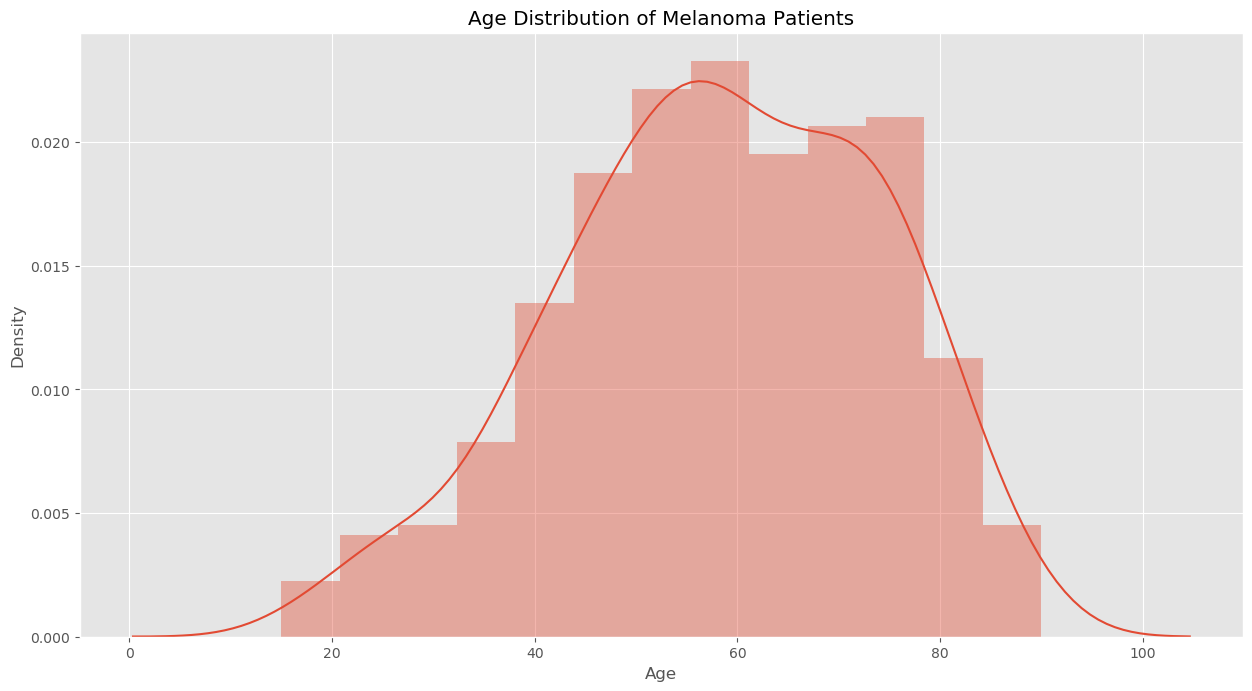

In [12]:
plt.figure()
sns.distplot(clinical_df.age_at_index)
plt.title('Age Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

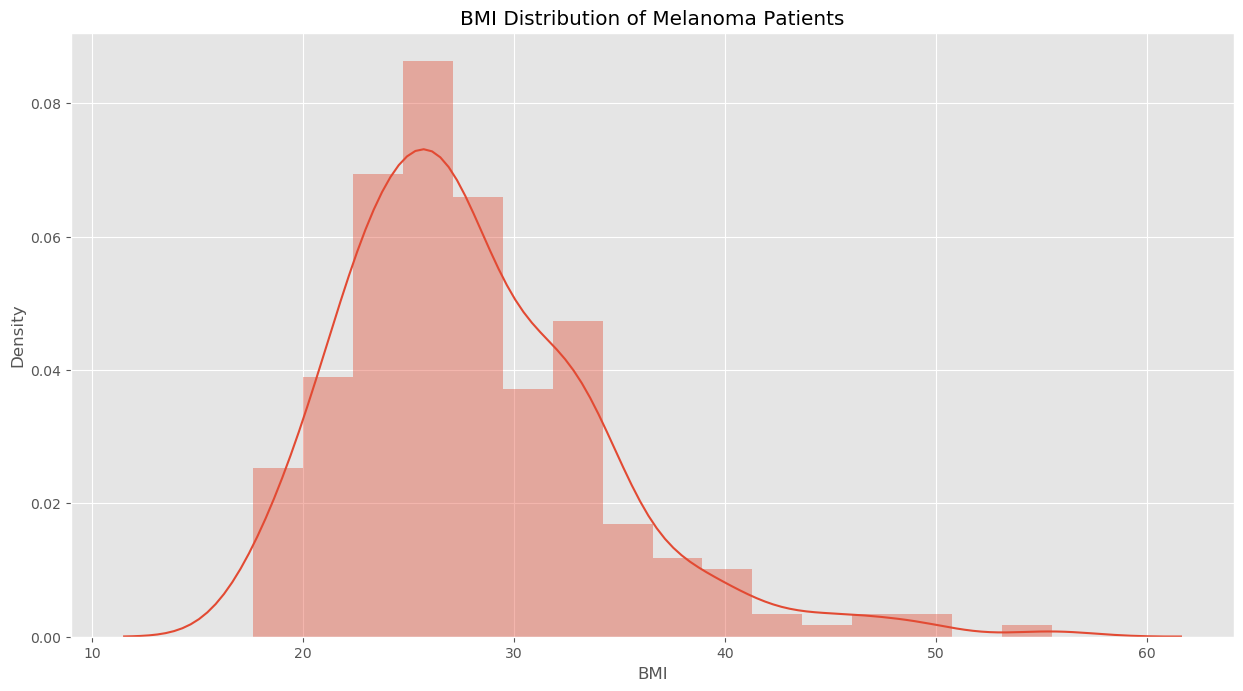

In [13]:
plt.figure()
sns.distplot(clinical_df.bmi)
plt.title('BMI Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('BMI', fontsize=12)
plt.show()

Alive           246
Dead            223
Not Reported      1
Name: vital_status, dtype: int64


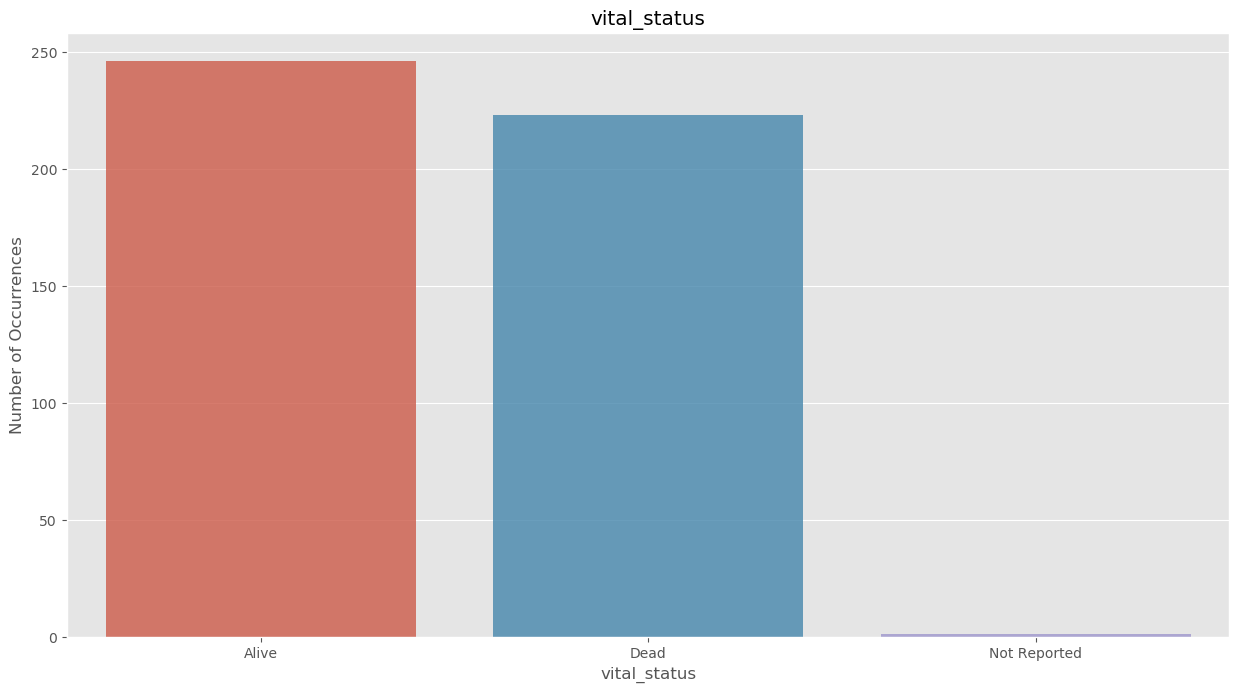

In [15]:
count  = clinical_df['vital_status'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('vital_status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('vital_status', fontsize=12)
plt.show()

male      290
female    180
Name: gender, dtype: int64


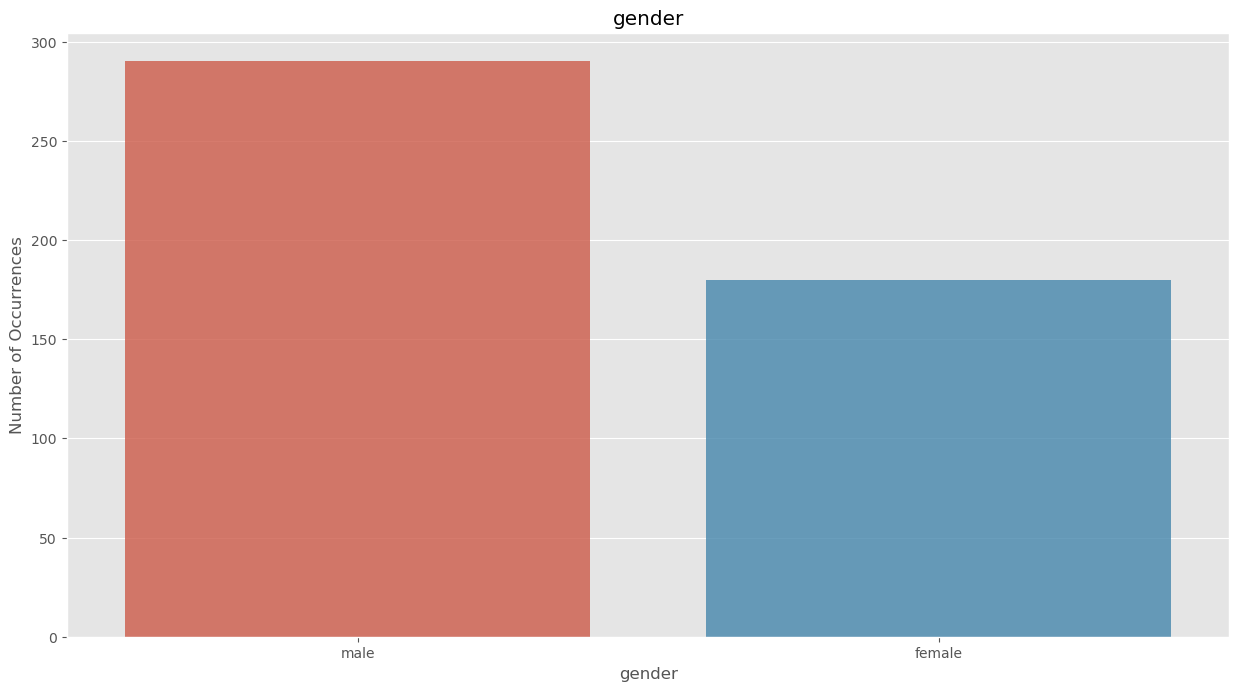

In [16]:
count  = clinical_df['gender'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()

not hispanic or latino    446
not reported               13
hispanic or latino         11
Name: ethnicity, dtype: int64


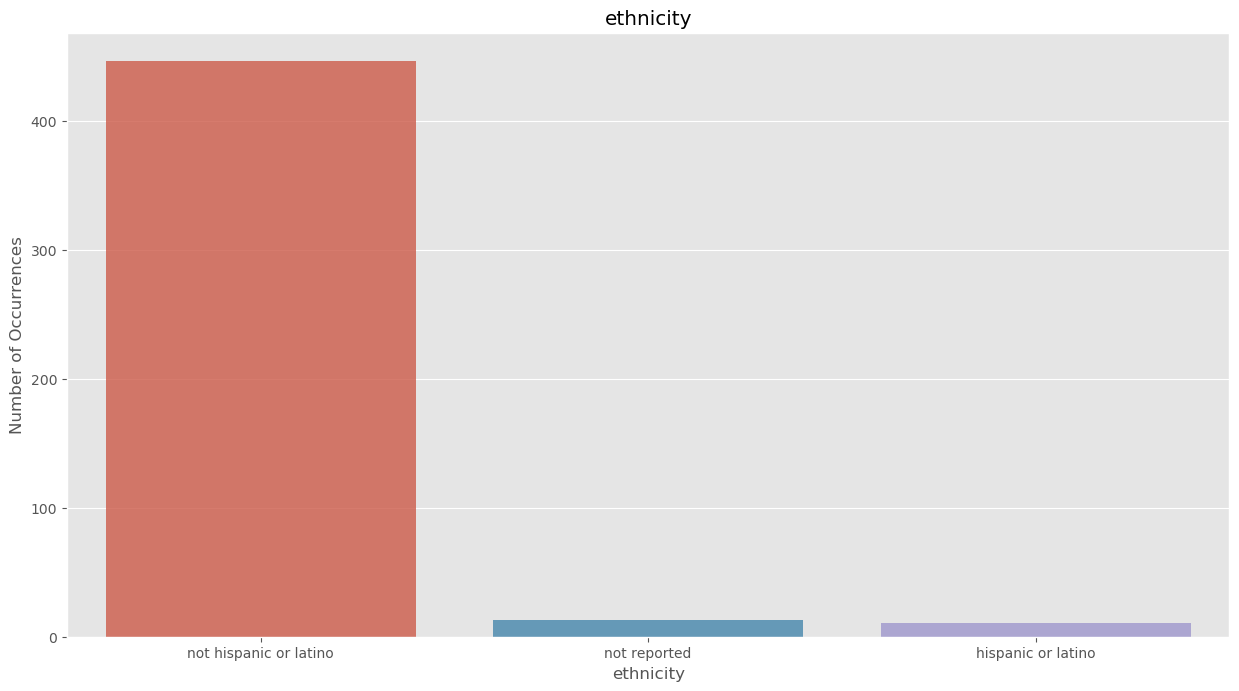

In [17]:
count  = clinical_df['ethnicity'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ethnicity', fontsize=12)
plt.show()

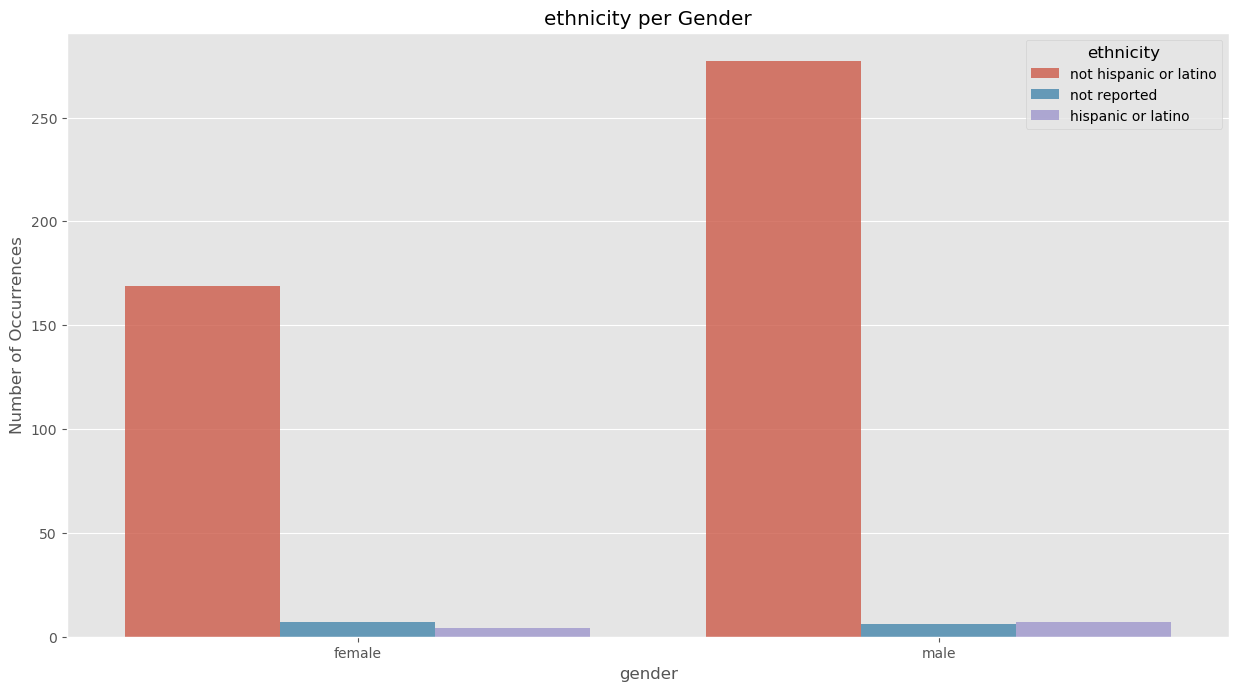

In [19]:
plt.figure()
sns.countplot(data=clinical_df, x='gender', hue='ethnicity', alpha=0.8)
plt.title('ethnicity per gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()

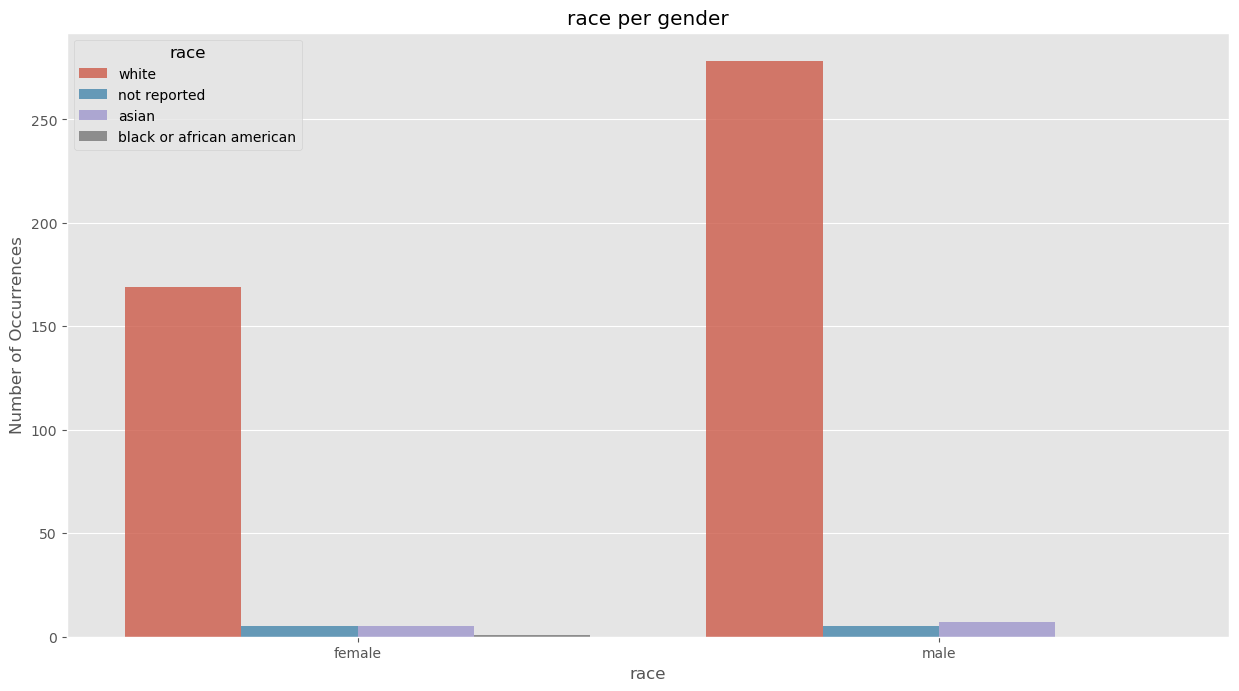

In [21]:
plt.figure()
sns.countplot(data=clinical_df, x='gender', hue='race', alpha=0.8)
plt.title('race per gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('race', fontsize=12)
plt.show()